# Exploratory Data Analysis

In [41]:
# Find JIRA dataset file from local Drive
!dir input

 Volume in drive C is Windows
 Volume Serial Number is 80A8-9307

 Directory of C:\Users\rahul\Desktop\Hackathon 2023\hackathon2023\input

11-07-2023  20:53    <DIR>          .
11-07-2023  20:53    <DIR>          ..
10-07-2023  15:27            46,712 Emp_data.csv
11-07-2023  20:53            54,560 Emp_data_v2.csv
10-07-2023  15:27            14,485 move_in_sync_data.csv
11-07-2023  20:53            14,485 move_in_sync_data_v2.csv
10-07-2023  15:27            27,146 vendor.csv
11-07-2023  20:53            28,883 vendor_v2.csv
               6 File(s)        186,271 bytes
               2 Dir(s)  53,826,654,208 bytes free


In [42]:
# Import labraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from prophet import Prophet

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning))

### Load datasets

In [45]:
employee_df = pd.read_csv('input/Emp_data_v2.csv')
employee_df.head()

,EMP_ID,Location,Swipe_In,Swipe_Out,day,Unnamed: 5,Unnamed: 6
0,8626487,MUM,04-10-2022 15:23,05-10-2022 01:23,Tue,NaN,NaN
1,8631177,MUM,08-06-2023 21:17,09-06-2023 07:17,Thu,NaN,NaN
2,8678631,MGP,23-12-2022 10:18,23-12-2022 19:18,Fri,NaN,NaN
3,8574819,BB,03-08-2022 18:26,04-08-2022 05:26,Wed,NaN,NaN
4,8587539,MGP,12-01-2023 12:57,12-01-2023 18:57,Thu,NaN,NaN


In [6]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EMP_ID      1035 non-null   int64  
 1   Location    1035 non-null   object 
 2   Swipe_In    1035 non-null   object 
 3   Swipe_Out   1035 non-null   object 
 4   day         1035 non-null   object 
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 56.7+ KB


In [8]:
# Convert to pandas datetime format
employee_df['Swipe_In']=pd.to_datetime(employee_df['Swipe_In'],  format='%d-%m-%Y %H:%M')
employee_df['Swipe_Out']=pd.to_datetime(employee_df['Swipe_Out'],  format='%d-%m-%Y %H:%M')

In [10]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EMP_ID      1035 non-null   int64         
 1   Location    1035 non-null   object        
 2   Swipe_In    1035 non-null   datetime64[ns]
 3   Swipe_Out   1035 non-null   datetime64[ns]
 4   day         1035 non-null   object        
 5   Unnamed: 5  0 non-null      float64       
 6   Unnamed: 6  0 non-null      float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 56.7+ KB


In [17]:
employee_df['Location'].value_counts()

Location
MGP    359
MUM    339
BB     337
Name: count, dtype: int64

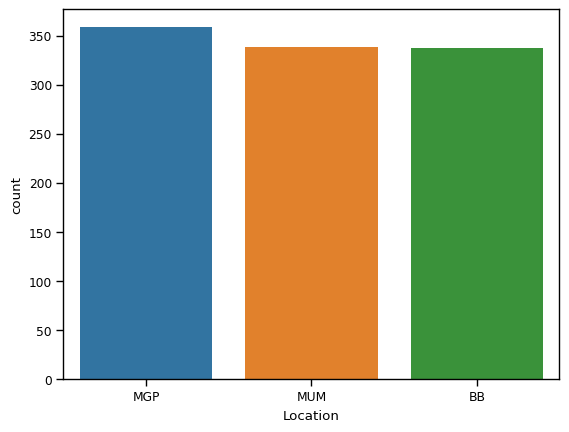

In [18]:
sns.set_context('paper')
sns.barplot(x=employee_df.Location.value_counts().index, y=employee_df.Location.value_counts())
plt.show()

In [19]:
employee_df.head()

,EMP_ID,Location,Swipe_In,Swipe_Out,day,Unnamed: 5,Unnamed: 6
0,8626487,MUM,2022-10-04 15:23:00,2022-10-05 01:23:00,Tue,NaN,NaN
1,8631177,MUM,2023-06-08 21:17:00,2023-06-09 07:17:00,Thu,NaN,NaN
2,8678631,MGP,2022-12-23 10:18:00,2022-12-23 19:18:00,Fri,NaN,NaN
3,8574819,BB,2022-08-03 18:26:00,2022-08-04 05:26:00,Wed,NaN,NaN
4,8587539,MGP,2023-01-12 12:57:00,2023-01-12 18:57:00,Thu,NaN,NaN


# Comute dataset

In [20]:
comute_df = pd.read_csv('input/move_in_sync_data_v2.csv')
comute_df.head()

,EMP_ID,Location,Car_Park,Commute_to_office_mins,Commute_from_office_mins
0,8626487,MGP,NO,21.0,32.0
1,8631177,MUM,YES,NaN,NaN
2,8678631,BB,NO,99.0,200.0
3,8574819,MUM,YES,NaN,NaN
4,8587539,BB,YES,NaN,NaN


In [21]:
new_df = pd.merge(employee_df, comute_df, on=["EMP_ID","Location"], how="left")

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EMP_ID                    1035 non-null   int64         
 1   Location                  1035 non-null   object        
 2   Swipe_In                  1035 non-null   datetime64[ns]
 3   Swipe_Out                 1035 non-null   datetime64[ns]
 4   day                       1035 non-null   object        
 5   Unnamed: 5                0 non-null      float64       
 6   Unnamed: 6                0 non-null      float64       
 7   Car_Park                  265 non-null    object        
 8   Commute_to_office_mins    134 non-null    float64       
 9   Commute_from_office_mins  134 non-null    float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 81.0+ KB


In [24]:
new_df.head()

,EMP_ID,Location,Swipe_In,Swipe_Out,day,Unnamed: 5,Unnamed: 6,Car_Park,Commute_to_office_mins,Commute_from_office_mins
0,8626487,MUM,2022-10-04 15:23:00,2022-10-05 01:23:00,Tue,NaN,NaN,NaN,NaN,NaN
1,8631177,MUM,2023-06-08 21:17:00,2023-06-09 07:17:00,Thu,NaN,NaN,YES,NaN,NaN
2,8678631,MGP,2022-12-23 10:18:00,2022-12-23 19:18:00,Fri,NaN,NaN,NaN,NaN,NaN
3,8574819,BB,2022-08-03 18:26:00,2022-08-04 05:26:00,Wed,NaN,NaN,NaN,NaN,NaN
4,8587539,MGP,2023-01-12 12:57:00,2023-01-12 18:57:00,Thu,NaN,NaN,NaN,NaN,NaN


In [26]:
# Considering Swipe_in date as working date
new_df['Working_Date'] = new_df['Swipe_In'].dt.date

In [27]:
new_df.head()

,EMP_ID,Location,Swipe_In,Swipe_Out,day,Unnamed: 5,Unnamed: 6,Car_Park,Commute_to_office_mins,Commute_from_office_mins,Working_Date
0,8626487,MUM,2022-10-04 15:23:00,2022-10-05 01:23:00,Tue,NaN,NaN,NaN,NaN,NaN,2022-10-04
1,8631177,MUM,2023-06-08 21:17:00,2023-06-09 07:17:00,Thu,NaN,NaN,YES,NaN,NaN,2023-06-08
2,8678631,MGP,2022-12-23 10:18:00,2022-12-23 19:18:00,Fri,NaN,NaN,NaN,NaN,NaN,2022-12-23
3,8574819,BB,2022-08-03 18:26:00,2022-08-04 05:26:00,Wed,NaN,NaN,NaN,NaN,NaN,2022-08-03
4,8587539,MGP,2023-01-12 12:57:00,2023-01-12 18:57:00,Thu,NaN,NaN,NaN,NaN,NaN,2023-01-12


In [59]:
new_df = new_df.loc[:, ~new_df.columns.str.contains('^Unnamed')]
new_df.drop(columns=['day'], inplace=True)

C:\Users\rahul\AppData\Local\Temp\ipykernel_7016\2192357122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['day'], inplace=True)


In [60]:
new_df['dayofweek'] = new_df['Swipe_In'].dt.dayofweek

C:\Users\rahul\AppData\Local\Temp\ipykernel_7016\1806753901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['dayofweek'] = new_df['Swipe_In'].dt.dayofweek


In [61]:
new_df.head()

,EMP_ID,Location,Swipe_In,Swipe_Out,Car_Park,Commute_to_office_mins,Commute_from_office_mins,Working_Date,dayofweek
0,8626487,MUM,2022-10-04 15:23:00,2022-10-05 01:23:00,NaN,NaN,NaN,2022-10-04,1
1,8631177,MUM,2023-06-08 21:17:00,2023-06-09 07:17:00,YES,NaN,NaN,2023-06-08,3
2,8678631,MGP,2022-12-23 10:18:00,2022-12-23 19:18:00,NaN,NaN,NaN,2022-12-23,4
3,8574819,BB,2022-08-03 18:26:00,2022-08-04 05:26:00,NaN,NaN,NaN,2022-08-03,2
4,8587539,MGP,2023-01-12 12:57:00,2023-01-12 18:57:00,NaN,NaN,NaN,2023-01-12,3


In [62]:
# map the day of the week number to its name
new_df['dayofweek'] = new_df['dayofweek'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

C:\Users\rahul\AppData\Local\Temp\ipykernel_7016\1691682954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['dayofweek'] = new_df['dayofweek'].map({


In [63]:
new_df.head()

,EMP_ID,Location,Swipe_In,Swipe_Out,Car_Park,Commute_to_office_mins,Commute_from_office_mins,Working_Date,dayofweek
0,8626487,MUM,2022-10-04 15:23:00,2022-10-05 01:23:00,NaN,NaN,NaN,2022-10-04,Tuesday
1,8631177,MUM,2023-06-08 21:17:00,2023-06-09 07:17:00,YES,NaN,NaN,2023-06-08,Thursday
2,8678631,MGP,2022-12-23 10:18:00,2022-12-23 19:18:00,NaN,NaN,NaN,2022-12-23,Friday
3,8574819,BB,2022-08-03 18:26:00,2022-08-04 05:26:00,NaN,NaN,NaN,2022-08-03,Wednesday
4,8587539,MGP,2023-01-12 12:57:00,2023-01-12 18:57:00,NaN,NaN,NaN,2023-01-12,Thursday


In [69]:
final_df = new_df[['Location','Swipe_In','Swipe_Out','Car_Park','Working_Date','dayofweek']]

In [70]:
final_df.head()

,Location,Swipe_In,Swipe_Out,Car_Park,Working_Date,dayofweek
0,MUM,2022-10-04 15:23:00,2022-10-05 01:23:00,NaN,2022-10-04,Tuesday
1,MUM,2023-06-08 21:17:00,2023-06-09 07:17:00,YES,2023-06-08,Thursday
2,MGP,2022-12-23 10:18:00,2022-12-23 19:18:00,NaN,2022-12-23,Friday
3,BB,2022-08-03 18:26:00,2022-08-04 05:26:00,NaN,2022-08-03,Wednesday
4,MGP,2023-01-12 12:57:00,2023-01-12 18:57:00,NaN,2023-01-12,Thursday


# Vendor dataset Cleaning

In [33]:
vendor_df = pd.read_csv('input/vendor_v2.csv')
vendor_df.head()

,Vendor,Date,Transaction_Value,Unnamed: 3,day
0,ANTARANG,01-09-2022 07:56,289,NaN,Thu
1,SWARA,07-02-2023 04:07,440,NaN,Tue
2,SUBWAY,09-03-2023 07:48,155,NaN,Thu
3,SWARA,29-05-2023 02:57,312,NaN,Mon
4,VOHUMAN,13-03-2023 14:18,459,NaN,Mon


In [34]:
# Convert to pandas datetime format
vendor_df['Date']=pd.to_datetime(vendor_df['Date'],  format='%d-%m-%Y %H:%M')

In [35]:
vendor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Vendor             808 non-null    object        
 1   Date               808 non-null    datetime64[ns]
 2   Transaction_Value  808 non-null    int64         
 3   Unnamed: 3         0 non-null      float64       
 4   day                808 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 31.7+ KB


In [46]:
vendor_df['dayofweek'] = vendor_df['Date'].dt.dayofweek

In [51]:
# map the day of the week number to its name
vendor_df['dayofweek'] = vendor_df['dayofweek'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

In [52]:
vendor_df.head()

,Vendor,Date,Transaction_Value,Unnamed: 3,day,dayofweek
0,ANTARANG,2022-09-01 07:56:00,289,NaN,Thu,Thursday
1,SWARA,2023-02-07 04:07:00,440,NaN,Tue,Tuesday
2,SUBWAY,2023-03-09 07:48:00,155,NaN,Thu,Thursday
3,SWARA,2023-05-29 02:57:00,312,NaN,Mon,Monday
4,VOHUMAN,2023-03-13 14:18:00,459,NaN,Mon,Monday


In [53]:
vendor_df = vendor_df.loc[:, ~vendor_df.columns.str.contains('^Unnamed')]

In [57]:
vendor_df.drop(columns=['day'], inplace=True)

C:\Users\rahul\AppData\Local\Temp\ipykernel_7016\2780518478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendor_df.drop(columns=['day'], inplace=True)


In [64]:
vendor_df['Transaction_Date'] = vendor_df['Date'].dt.date

C:\Users\rahul\AppData\Local\Temp\ipykernel_7016\2721749172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendor_df['Transaction_Date'] = vendor_df['Date'].dt.date


In [65]:
vendor_df.head()

,Vendor,Date,Transaction_Value,dayofweek,Transaction_Date
0,ANTARANG,2022-09-01 07:56:00,289,Thursday,2022-09-01
1,SWARA,2023-02-07 04:07:00,440,Tuesday,2023-02-07
2,SUBWAY,2023-03-09 07:48:00,155,Thursday,2023-03-09
3,SWARA,2023-05-29 02:57:00,312,Monday,2023-05-29
4,VOHUMAN,2023-03-13 14:18:00,459,Monday,2023-03-13


# Analysis 

In [71]:
final_df.head()

,Location,Swipe_In,Swipe_Out,Car_Park,Working_Date,dayofweek
0,MUM,2022-10-04 15:23:00,2022-10-05 01:23:00,NaN,2022-10-04,Tuesday
1,MUM,2023-06-08 21:17:00,2023-06-09 07:17:00,YES,2023-06-08,Thursday
2,MGP,2022-12-23 10:18:00,2022-12-23 19:18:00,NaN,2022-12-23,Friday
3,BB,2022-08-03 18:26:00,2022-08-04 05:26:00,NaN,2022-08-03,Wednesday
4,MGP,2023-01-12 12:57:00,2023-01-12 18:57:00,NaN,2023-01-12,Thursday


<Axes: >

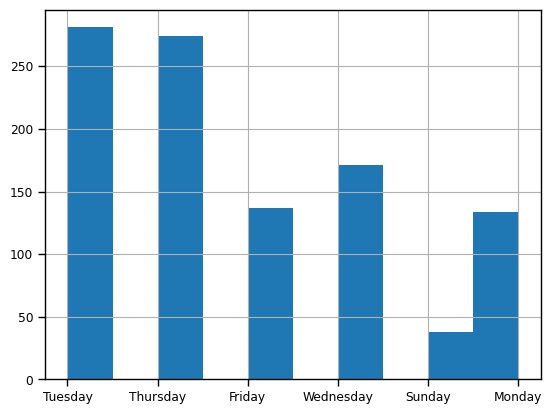

In [78]:
# Draw a histogram of a column (the distribution of dayofweek).
final_df.dayofweek.hist()

In [80]:
final_df.dayofweek.value_counts()  

dayofweek
Tuesday      281
Thursday     274
Wednesday    171
Friday       137
Monday       134
Sunday        38
Name: count, dtype: int64

<Axes: >

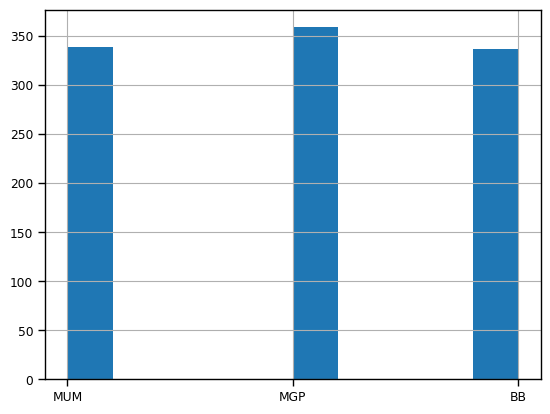

In [82]:
# Draw a histogram of a column (the distribution of dayofweek).
final_df.Location.hist()

In [83]:
final_df.Location.value_counts()  

Location
MGP    359
MUM    339
BB     337
Name: count, dtype: int64

In [84]:
final_df = final_df.set_index('Working_Date')

In [85]:
final_df.head()

,Location,Swipe_In,Swipe_Out,Car_Park,dayofweek
Working_Date,,,,,
2022-10-04,MUM,2022-10-04 15:23:00,2022-10-05 01:23:00,NaN,Tuesday
2023-06-08,MUM,2023-06-08 21:17:00,2023-06-09 07:17:00,YES,Thursday
2022-12-23,MGP,2022-12-23 10:18:00,2022-12-23 19:18:00,NaN,Friday
2022-08-03,BB,2022-08-03 18:26:00,2022-08-04 05:26:00,NaN,Wednesday
2023-01-12,MGP,2023-01-12 12:57:00,2023-01-12 18:57:00,NaN,Thursday


In [87]:
final_df['Year'] = final_df.Swipe_In.dt.year
final_df['Month'] = final_df.Swipe_In.dt.month

In [88]:
final_df.head()

,Location,Swipe_In,Swipe_Out,Car_Park,dayofweek,Year,Month
Working_Date,,,,,,,
2022-10-04,MUM,2022-10-04 15:23:00,2022-10-05 01:23:00,NaN,Tuesday,2022,10
2023-06-08,MUM,2023-06-08 21:17:00,2023-06-09 07:17:00,YES,Thursday,2023,6
2022-12-23,MGP,2022-12-23 10:18:00,2022-12-23 19:18:00,NaN,Friday,2022,12
2022-08-03,BB,2022-08-03 18:26:00,2022-08-04 05:26:00,NaN,Wednesday,2022,8
2023-01-12,MGP,2023-01-12 12:57:00,2023-01-12 18:57:00,NaN,Thursday,2023,1


In [92]:
final_df[final_df.Year == 2022]

,Location,Swipe_In,Swipe_Out,Car_Park,dayofweek,Year,Month
Working_Date,,,,,,,
2022-10-04,MUM,2022-10-04 15:23:00,2022-10-05 01:23:00,NaN,Tuesday,2022,10
2022-12-23,MGP,2022-12-23 10:18:00,2022-12-23 19:18:00,NaN,Friday,2022,12
2022-08-03,BB,2022-08-03 18:26:00,2022-08-04 05:26:00,NaN,Wednesday,2022,8
2022-09-13,MUM,2022-09-13 23:39:00,2022-09-14 11:39:00,NO,Tuesday,2022,9
2022-12-13,BB,2022-12-13 07:45:00,2022-12-13 15:45:00,NaN,Tuesday,2022,12
...,...,...,...,...,...,...,...
2022-07-21,MGP,2022-07-21 06:12:00,2022-07-21 17:12:00,NaN,Thursday,2022,7
2022-09-29,MGP,2022-09-29 19:13:00,2022-09-30 01:13:00,NaN,Thursday,2022,9
2022-12-08,BB,2022-12-08 22:09:00,2022-12-09 06:09:00,NaN,Thursday,2022,12


In [98]:
final_df.index =  pd.to_datetime(final_df.index)

In [125]:
final_df.head()

,Location,Swipe_In,Swipe_Out,Car_Park,dayofweek,Year,Month
Working_Date,,,,,,,
2022-10-04,MUM,2022-10-04 15:23:00,2022-10-05 01:23:00,NaN,Tuesday,2022,10
2023-06-08,MUM,2023-06-08 21:17:00,2023-06-09 07:17:00,YES,Thursday,2023,6
2022-12-23,MGP,2022-12-23 10:18:00,2022-12-23 19:18:00,NaN,Friday,2022,12
2022-08-03,BB,2022-08-03 18:26:00,2022-08-04 05:26:00,NaN,Wednesday,2022,8
2023-01-12,MGP,2023-01-12 12:57:00,2023-01-12 18:57:00,NaN,Thursday,2023,1


<Axes: xlabel='Working_Date'>

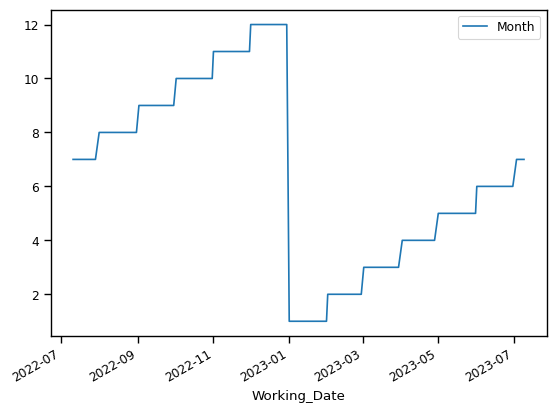

In [127]:
final_df[['Month']].plot()

In [129]:
final_df.head()

,Location,Swipe_In,Swipe_Out,Car_Park,dayofweek,Year,Month
Working_Date,,,,,,,
2022-10-04,MUM,2022-10-04 15:23:00,2022-10-05 01:23:00,NaN,Tuesday,2022,10
2023-06-08,MUM,2023-06-08 21:17:00,2023-06-09 07:17:00,YES,Thursday,2023,6
2022-12-23,MGP,2022-12-23 10:18:00,2022-12-23 19:18:00,NaN,Friday,2022,12
2022-08-03,BB,2022-08-03 18:26:00,2022-08-04 05:26:00,NaN,Wednesday,2022,8
2023-01-12,MGP,2023-01-12 12:57:00,2023-01-12 18:57:00,NaN,Thursday,2023,1


In [128]:
vendor_df.head()

,Vendor,Date,Transaction_Value,dayofweek,Transaction_Date
0,ANTARANG,2022-09-01 07:56:00,289,Thursday,2022-09-01
1,SWARA,2023-02-07 04:07:00,440,Tuesday,2023-02-07
2,SUBWAY,2023-03-09 07:48:00,155,Thursday,2023-03-09
3,SWARA,2023-05-29 02:57:00,312,Monday,2023-05-29
4,VOHUMAN,2023-03-13 14:18:00,459,Monday,2023-03-13


In [131]:
vendor_df= vendor_df.set_index('Transaction_Date')

In [132]:
vendor_df.head()

,Vendor,Date,Transaction_Value,dayofweek
Transaction_Date,,,,
2022-09-01,ANTARANG,2022-09-01 07:56:00,289,Thursday
2023-02-07,SWARA,2023-02-07 04:07:00,440,Tuesday
2023-03-09,SUBWAY,2023-03-09 07:48:00,155,Thursday
2023-05-29,SWARA,2023-05-29 02:57:00,312,Monday
2023-03-13,VOHUMAN,2023-03-13 14:18:00,459,Monday


In [204]:
dataframe = pd.merge(final_df, vendor_df, left_index=True, right_index=True)

In [205]:
dataframe.head()

,Location,Swipe_In,Swipe_Out,Car_Park,dayofweek_x,Year,Month,Vendor,Date,Transaction_Value,dayofweek_y
Working_Date,,,,,,,,,,,
2022-07-11,MGP,2022-07-11 02:38:00,2022-07-11 14:38:00,NaN,Monday,2022,7,BISTRO,2022-07-11 21:38:00,467,Monday
2022-07-11,MGP,2022-07-11 02:38:00,2022-07-11 14:38:00,NaN,Monday,2022,7,ANTARANG,2022-07-11 04:17:00,225,Monday
2022-07-11,BB,2022-07-11 21:18:00,2022-07-12 07:18:00,NaN,Monday,2022,7,BISTRO,2022-07-11 21:38:00,467,Monday
2022-07-11,BB,2022-07-11 21:18:00,2022-07-12 07:18:00,NaN,Monday,2022,7,ANTARANG,2022-07-11 04:17:00,225,Monday
2022-07-11,BB,2022-07-11 21:38:00,2022-07-12 04:38:00,NaN,Monday,2022,7,BISTRO,2022-07-11 21:38:00,467,Monday


In [206]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3246 entries, 2022-07-11 to 2023-07-09
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Location           3246 non-null   object        
 1   Swipe_In           3246 non-null   datetime64[ns]
 2   Swipe_Out          3246 non-null   datetime64[ns]
 3   Car_Park           766 non-null    object        
 4   dayofweek_x        3246 non-null   object        
 5   Year               3246 non-null   int32         
 6   Month              3246 non-null   int32         
 7   Vendor             3246 non-null   object        
 8   Date               3246 non-null   datetime64[ns]
 9   Transaction_Value  3246 non-null   int64         
 10  dayofweek_y        3246 non-null   object        
dtypes: datetime64[ns](3), int32(2), int64(1), object(5)
memory usage: 279.0+ KB


In [207]:
# Drop more than 50 % Null values columns
dataframe.drop(columns=['Car_Park','dayofweek_y'], inplace=True)

In [208]:
dataframe.head()

,Location,Swipe_In,Swipe_Out,dayofweek_x,Year,Month,Vendor,Date,Transaction_Value
Working_Date,,,,,,,,,
2022-07-11,MGP,2022-07-11 02:38:00,2022-07-11 14:38:00,Monday,2022,7,BISTRO,2022-07-11 21:38:00,467
2022-07-11,MGP,2022-07-11 02:38:00,2022-07-11 14:38:00,Monday,2022,7,ANTARANG,2022-07-11 04:17:00,225
2022-07-11,BB,2022-07-11 21:18:00,2022-07-12 07:18:00,Monday,2022,7,BISTRO,2022-07-11 21:38:00,467
2022-07-11,BB,2022-07-11 21:18:00,2022-07-12 07:18:00,Monday,2022,7,ANTARANG,2022-07-11 04:17:00,225
2022-07-11,BB,2022-07-11 21:38:00,2022-07-12 04:38:00,Monday,2022,7,BISTRO,2022-07-11 21:38:00,467


In [209]:
dataframe.Vendor.unique().tolist()

['BISTRO',
 'ANTARANG',
 'SUBWAY',
 'WOK',
 'SWARA',
 'VOHUMAN',
 'JUICE BAR',
 'SOUTHERN EXPRESS']

In [210]:
import plotly.express as px

In [ ]:
dataframe.index.value_counts().values.tolist()

In [212]:
dataframe.Vendor.value_counts()
# dataframe.groupby('Vendor').Vendor.count()

Vendor
ANTARANG            701
SOUTHERN EXPRESS    536
SWARA               460
WOK                 347
SUBWAY              324
JUICE BAR           304
VOHUMAN             296
BISTRO              278
Name: count, dtype: int64

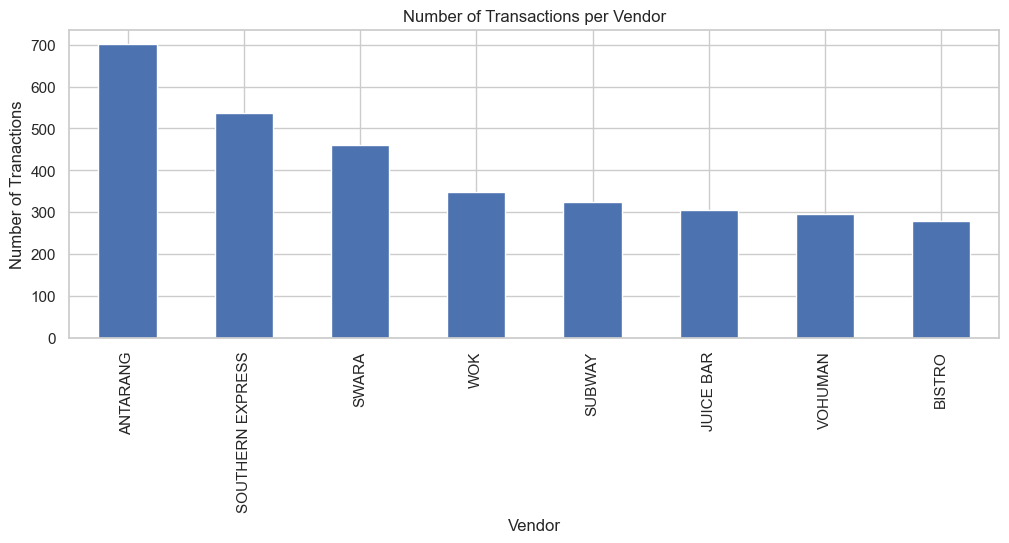

In [217]:
dataframe.Vendor.value_counts().plot(kind='bar',figsize=(12,4)) 
plt.xlabel('Vendor');
plt.ylabel('Number of Tranactions');
plt.title('Number of Transactions per Vendor');

In [221]:
dataframe.reset_index(level=0, inplace=True)

In [229]:
dataframe.groupby('Vendor').Transaction_Value.mean()

Vendor
ANTARANG            236.236805
BISTRO              297.312950
JUICE BAR           230.532895
SOUTHERN EXPRESS    295.082090
SUBWAY              269.672840
SWARA               280.471739
VOHUMAN             263.449324
WOK                 248.878963
Name: Transaction_Value, dtype: float64

<Axes: >

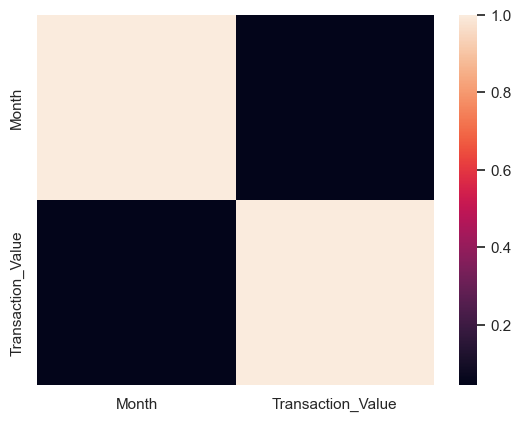

In [234]:
sns.heatmap(dataframe[['Month','Transaction_Value']].corr())

C:\Users\rahul\anaconda3\envs\hackathon\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



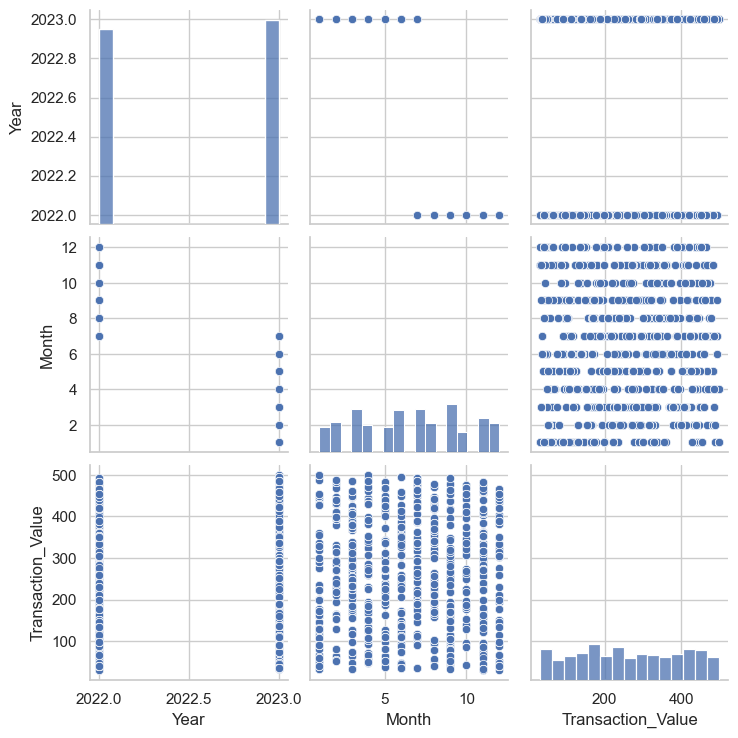

In [235]:
sns.pairplot(dataframe)